In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
import utils

In [2]:
subj = utils.ExpInfo.getSubjIDs()[2]
task = utils.ExpInfo.taskName[0]
nTrial = 10


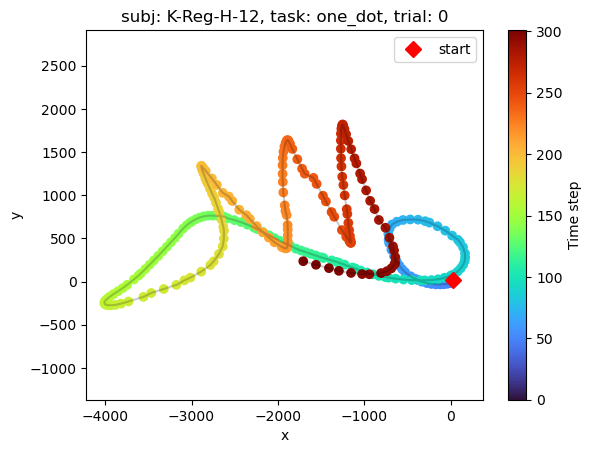

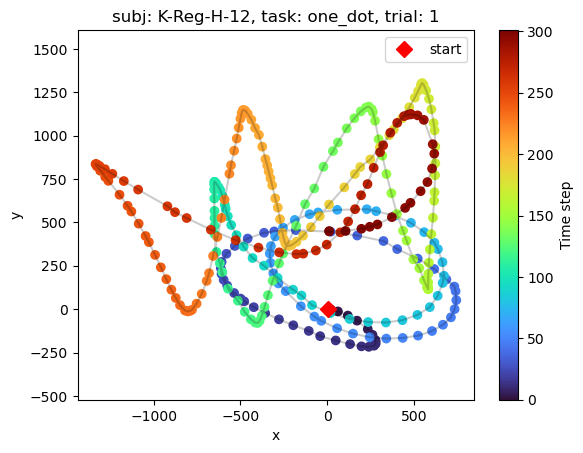

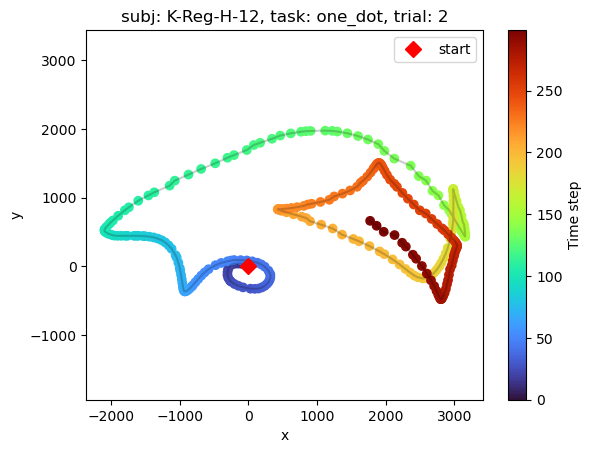

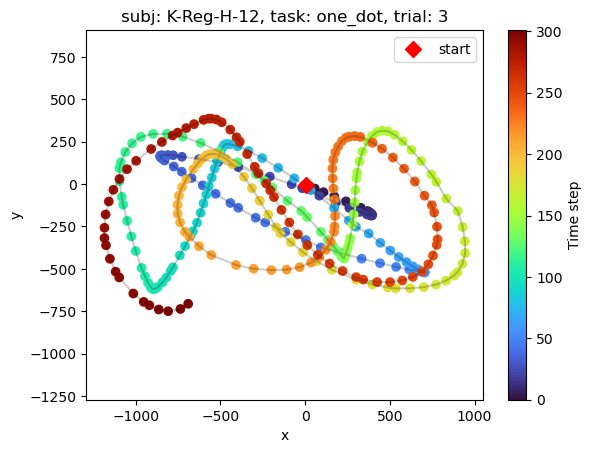

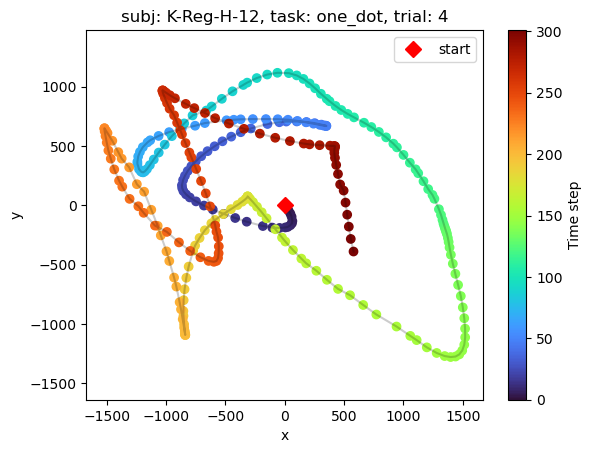

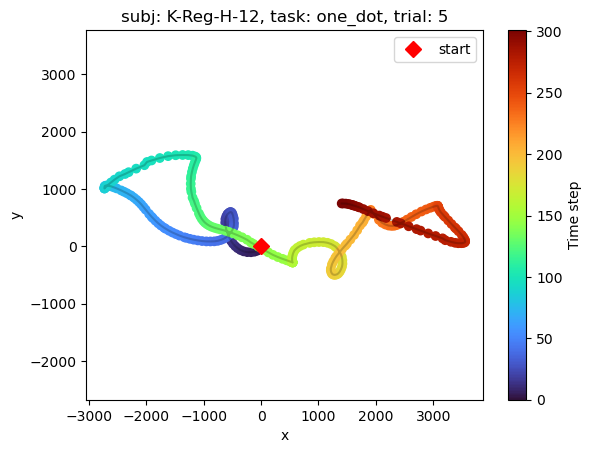

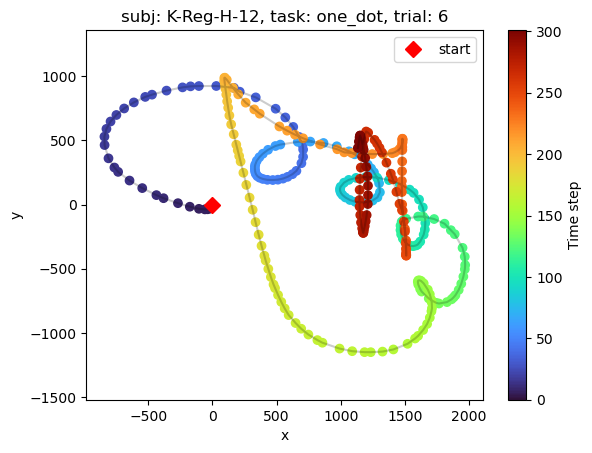

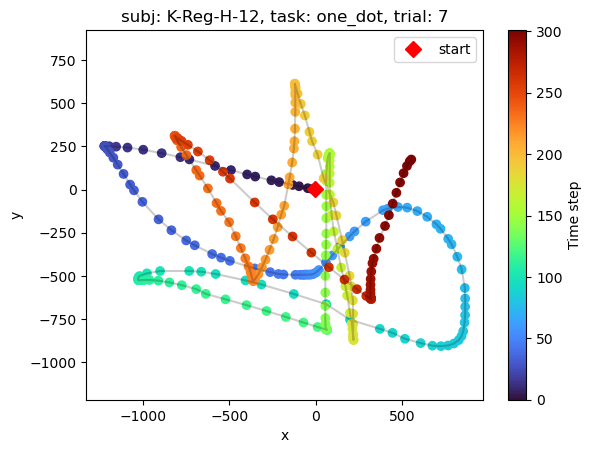

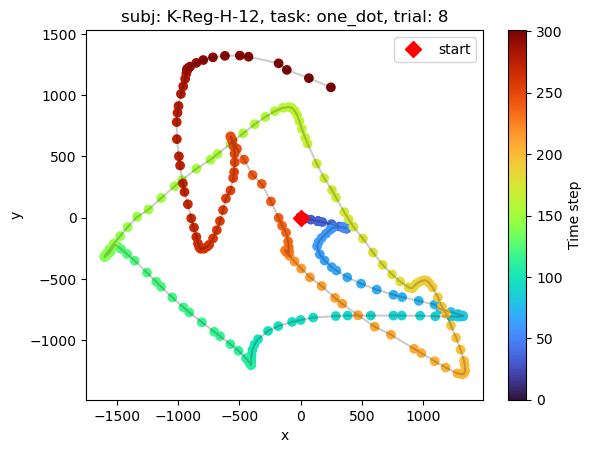

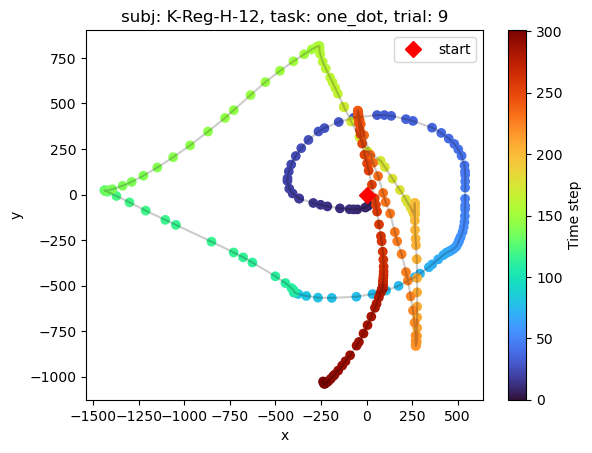

In [6]:
subj = utils.ExpInfo.getSubjIDs()[2]
task = utils.ExpInfo.taskName[0]
nTrial = 10

for iTrial in range(nTrial):
    df_beh = utils.LoadData.behaviorData(subj, task)
    df = utils.LoadData.mouseMovement(subj, task, df_beh['trial no.'].iloc[iTrial])
    x = df['x-shift'].values.cumsum()
    y = df['y-shift'].values.cumsum()
    fig, ax = plt.subplots()
    utils.Plot.traj_withColour(x, y, fig, ax)
    ax.set_title('subj: {}, task: {}, trial: {}'.format(subj, task, iTrial))
    plt.show()

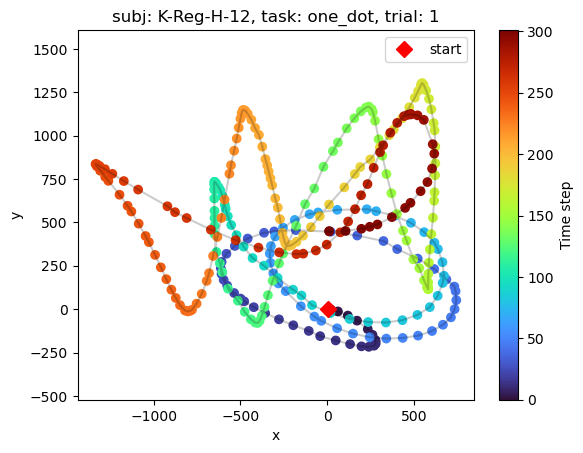

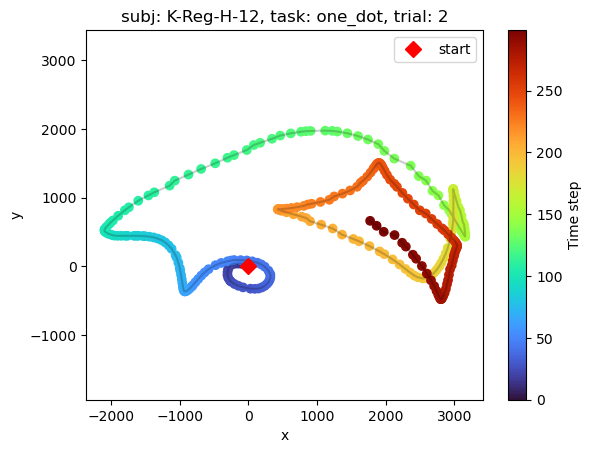

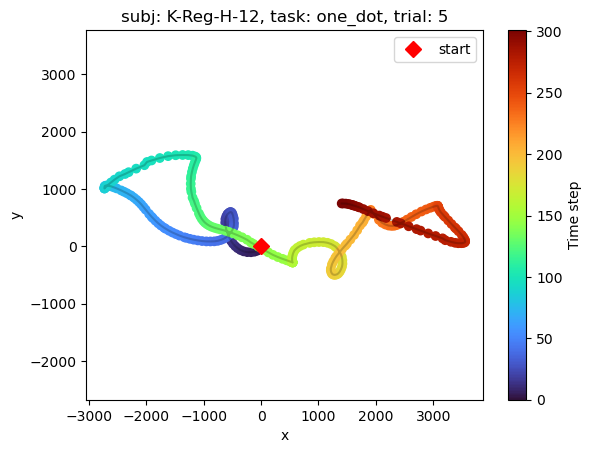

In [27]:
trials = [1, 2, 5]

# load data
for iTrial in trials:
    df = utils.LoadData.mouseMovement(subj, task, iTrial+1)
    x = df['x-shift'].values.cumsum()
    y = df['y-shift'].values.cumsum()
    fig, ax = plt.subplots()
    utils.Plot.traj_withColour(x, y, fig, ax)
    ax.set_title('subj: {}, task: {}, trial: {}'.format(subj, task, iTrial))
    plt.show()
    
    filename = utils.Save.savepath('ms_dim', f"subj_{subj}_task_{task}_trial_{iTrial}_traj.pdf")
    fig.savefig(filename)    

In [21]:
import umap
import plotly.express as px
import plotly.graph_objs as go

x, h, y = utils.LoadData.xhy(subj, task)
for iTrial in trials:
    h_trial = h[iTrial]
    h_trial.shape
    print(h_trial.shape)
    
    # UMAP
    fit = umap.UMAP(n_components=3)
    u = fit.fit_transform(h_trial)
    
    # # plot UMAP by plotly
    # fig = go.Figure()
    # fig.add_trace(go.Scatter3d(x=u[:,0], y=u[:,1], z=u[:,2], mode='markers'))
    # fig.show()
    

    # Assuming 'u' is your UMAP transformed data
    fig = px.scatter_3d(x=u[:,0], y=u[:,1], z=u[:,2], 
                        color=np.linspace(0, 1, len(u)), 
                        color_continuous_scale ='turbo', 
                        size=np.ones(len(u)), width=1000, height=1000)

    fig.add_scatter3d(x=u[:,0], y=u[:,1], z=u[:,2], mode='lines', opacity=0.3,
                    marker=dict(color='rgb(0, 0, 0)',
                                size=10),
                    line=dict(width=5))

    fig.update_layout(scene = dict(
                        xaxis_title='UMAP 1',
                        yaxis_title='UMAP 2',
                        zaxis_title='UMAP 3'))

    fig.update_layout(scene = dict(aspectmode='cube'))

    fig.show()

    

(241, 16)


(239, 16)


(241, 16)


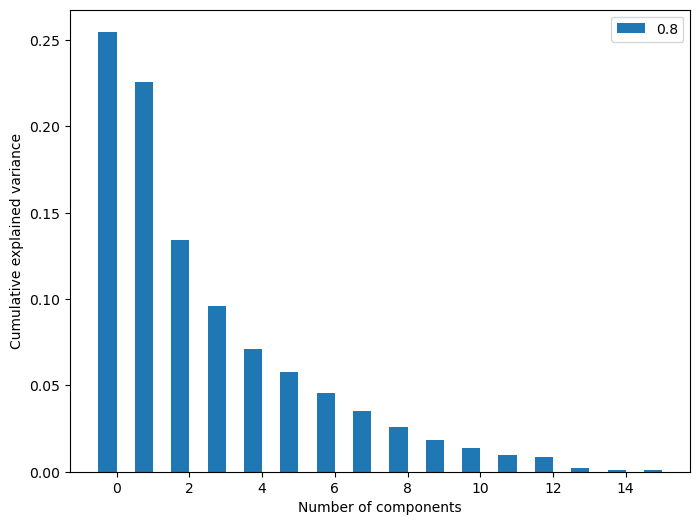

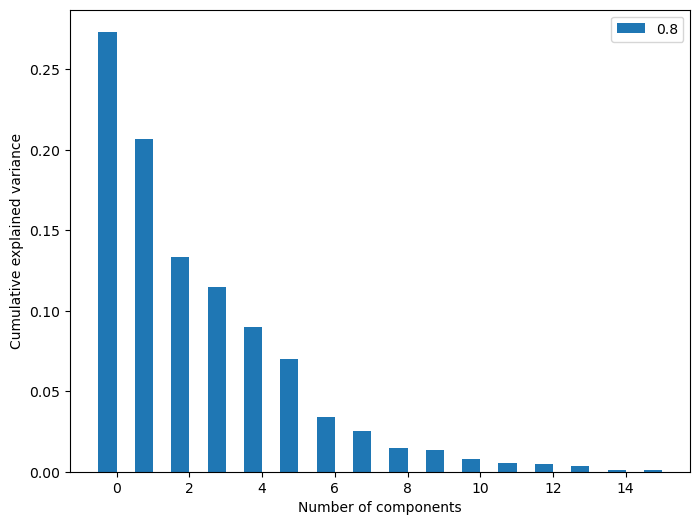

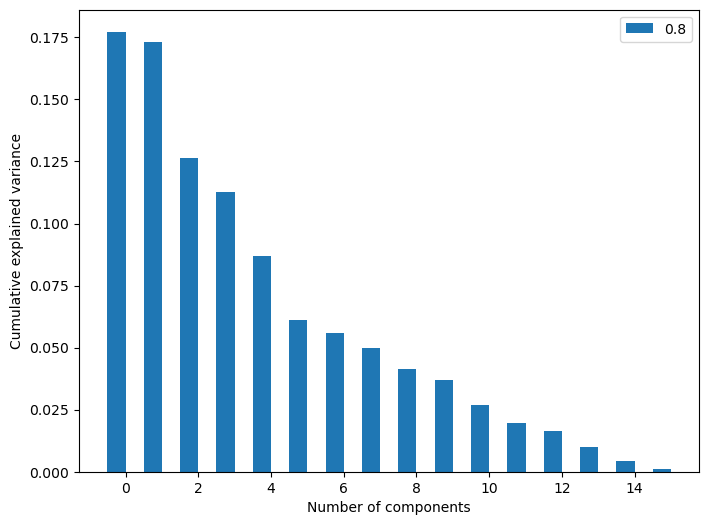

In [23]:
# compute PCA
for iTrial in trials:
    h_trial = h[iTrial]
    pca = utils.Analysis.pca(h_trial)
    
    n = len(pca.explained_variance_ratio_)
    p1 = pca.explained_variance_ratio_



    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    # ax.bar(range(n), np.array([p1, p2]))
    ax.bar(np.arange(n)-0.25, p1, label='0.8', width = 0.5)

    # pca = utils.Analysis.pca(h[4])
    # n = len(pca.explained_variance_ratio_)
    # ax.bar(range(n), pca.explained_variance_ratio_)


    ax.set_xlabel('Number of components')
    ax.set_ylabel('Cumulative explained variance')
    ax.legend()

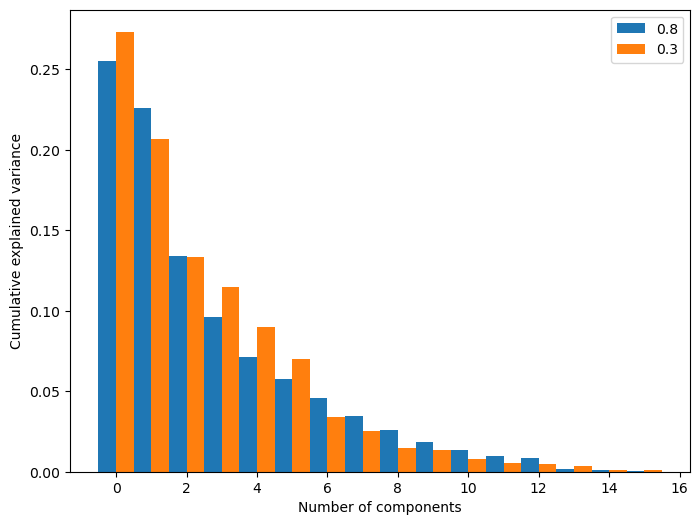

In [24]:
pca = utils.Analysis.pca(h[1])
n = len(pca.explained_variance_ratio_)
p1 = pca.explained_variance_ratio_

pca = utils.Analysis.pca(h[2])
p2 = pca.explained_variance_ratio_



fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# ax.bar(range(n), np.array([p1, p2]))
ax.bar(np.arange(n)-0.25, p1, label='0.8', width = 0.5)
ax.bar(np.arange(n)+0.25, p2, label='0.3', width = 0.5)

# pca = utils.Analysis.pca(h[4])
# n = len(pca.explained_variance_ratio_)
# ax.bar(range(n), pca.explained_variance_ratio_)


ax.set_xlabel('Number of components')
ax.set_ylabel('Cumulative explained variance')
ax.legend()

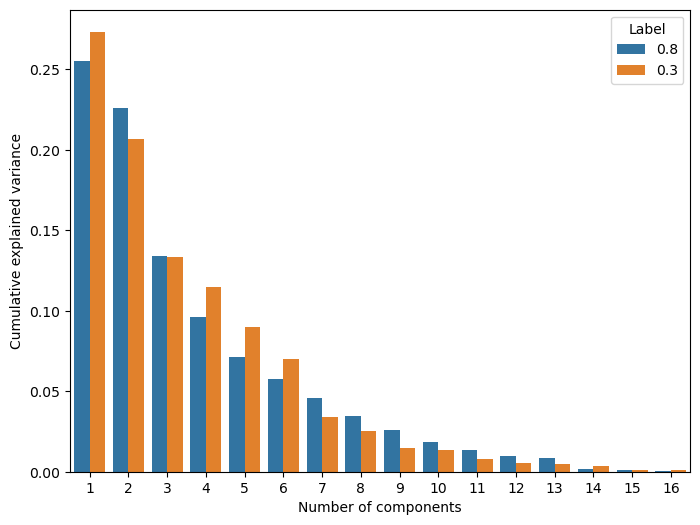

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

pca = utils.Analysis.pca(h[1])
n = len(pca.explained_variance_ratio_)
p1 = pca.explained_variance_ratio_

pca = utils.Analysis.pca(h[2])
p2 = pca.explained_variance_ratio_

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

data = pd.DataFrame({'Component': range(1, n+1), '0.8': p1, '0.3': p2})
data = data.melt('Component', var_name='Label', value_name='Explained Variance')

sns.barplot(x='Component', y='Explained Variance', hue='Label', data=data, ax=ax)

ax.set_xlabel('Number of components')
ax.set_ylabel('Cumulative explained variance')
ax.legend(title='Label')

# save as pdf
fn = utils.Save.savepath('ms_dim', 'pca.pdf')
plt.savefig(fn)